In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage.filters import gaussian
from scipy.fft import fft2, fftshift

In [5]:
# ====== CONFIG ======
IMG_PATH = "/content/car.jpg"   # <-- set this to your uploaded image
DOWNSAMPLE_FACTORS = [2, 4, 8]
SAVE_OUTPUTS = True
OUT_DIR = "task1_outputs"
# ====================

os.makedirs(OUT_DIR, exist_ok=True)

In [6]:
# ---- Load image (convert to grayscale float [0,1]) ----
img_in = io.imread(IMG_PATH)
if img_in.ndim == 3:
    img = color.rgb2gray(img_in)
else:
    img = img_in
img = img_as_float(img)

In [7]:
# ---- Helpers ----
def magnitude_spectrum(im):
    F = fft2(im)
    F_shift = fftshift(F)               # shift DC to center
    mag = np.log1p(np.abs(F_shift))     # log scale for visibility
    return mag

def downsample_naive(im, factor):
    # pick every k-th pixel (no prefilter): shape roughly (H/f, W/f)
    return im[::factor, ::factor]

def downsample_prefilter(im, factor, sigma=None):
    # Rule of thumb: sigma ≈ factor/2 for anti-aliasing
    s = sigma if sigma is not None else factor / 2.0
    blurred = gaussian(im, sigma=s, preserve_range=True)
    return blurred[::factor, ::factor]

def show_and_maybe_save(arr, title, fname=None):
    plt.figure()
    plt.imshow(arr, cmap="gray", vmin=0, vmax=arr.max() if arr.ndim==2 else None)
    plt.title(title)
    plt.axis("off")
    if SAVE_OUTPUTS and fname:
        path = os.path.join(OUT_DIR, fname)
        plt.savefig(path, bbox_inches="tight", pad_inches=0)
    plt.show()

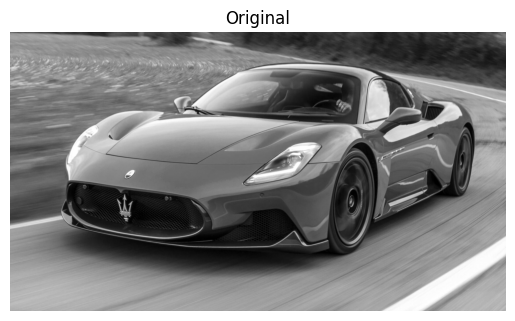

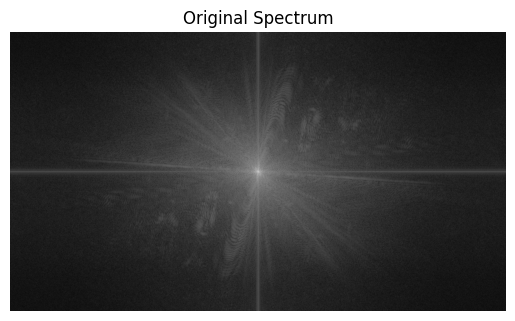

In [8]:
# ---- Original + spectrum ----
show_and_maybe_save(img, "Original", "original.png")
show_and_maybe_save(magnitude_spectrum(img), "Original Spectrum", "original_spectrum.png")

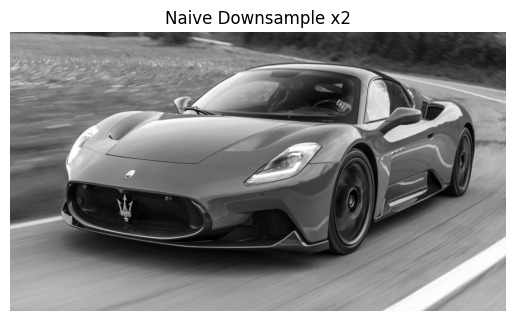

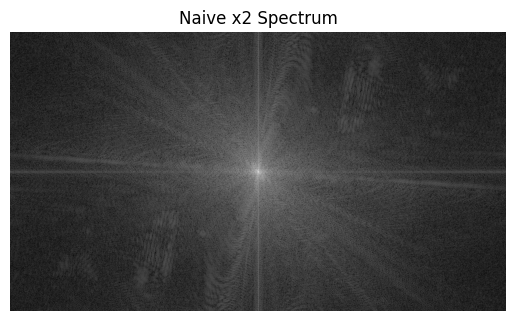

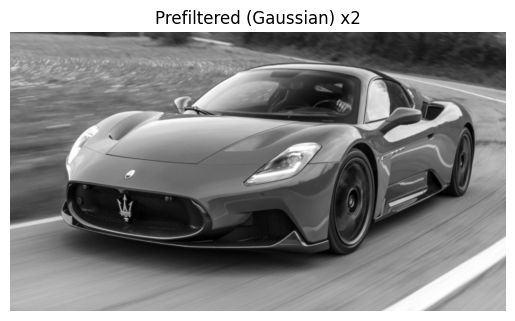

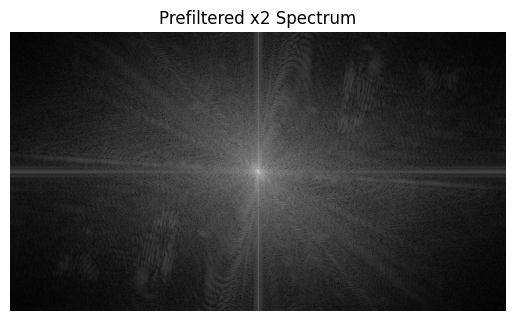

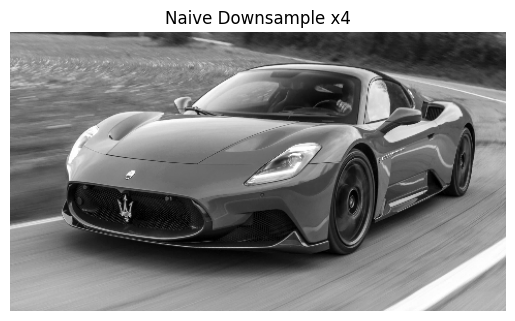

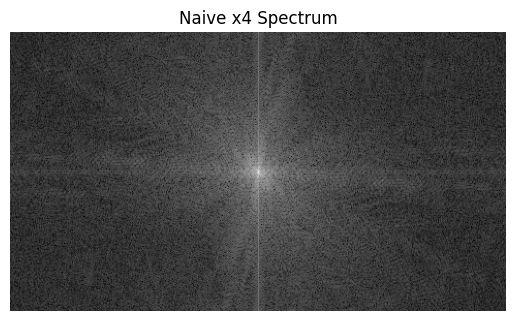

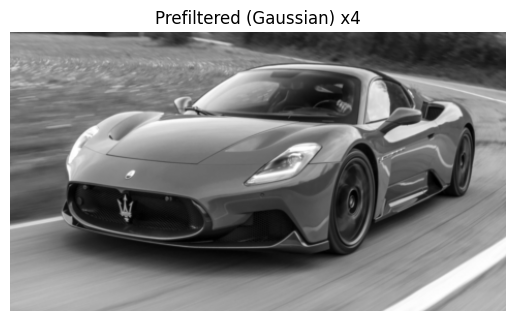

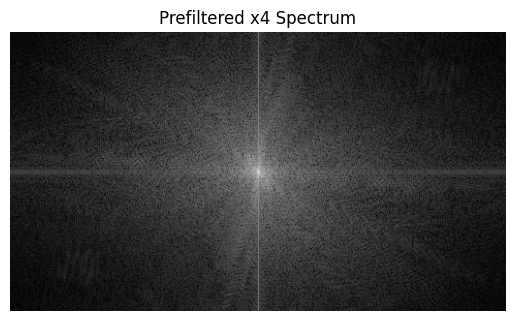

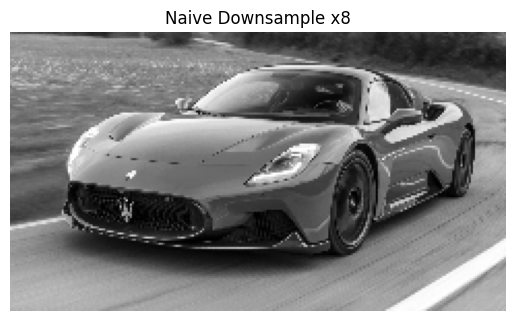

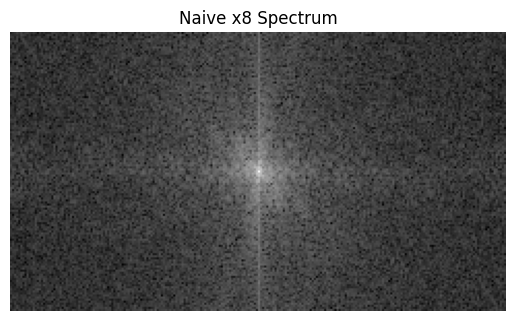

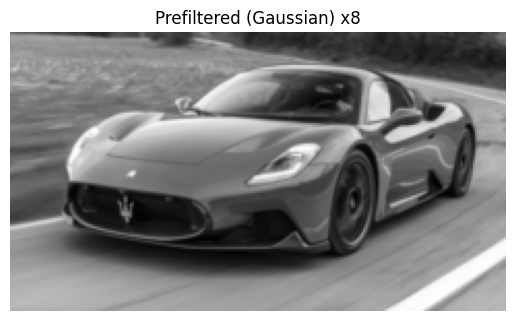

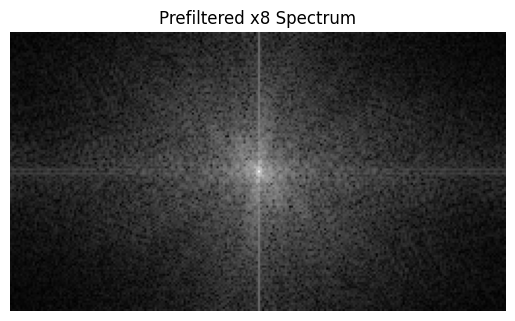

In [11]:
# ---- Downsampling (naïve vs prefilter) + spectra ----
for f in DOWNSAMPLE_FACTORS:
    # Naïve
    im_naive = downsample_naive(img, f)
    show_and_maybe_save(im_naive, f"Naive Downsample x{f}", f"naive_x{f}.png")
    show_and_maybe_save(magnitude_spectrum(im_naive), f"Naive x{f} Spectrum", f"naive_x{f}_spectrum.png")

    # Prefiltered (Gaussian) before sampling
    im_pref = downsample_prefilter(img, f)
    show_and_maybe_save(im_pref, f"Prefiltered (Gaussian) x{f}", f"prefilter_x{f}.png")
    show_and_maybe_save(magnitude_spectrum(im_pref), f"Prefiltered x{f} Spectrum", f"prefilter_x{f}_spectrum.png")


In [12]:
# ---- ≤100-word explanation (optional: print or save) ----
nyquist_explanation = (
    "Prefiltering with a low-pass (e.g., Gaussian) before downsampling attenuates high-frequency content above the new Nyquist limit (half the post-downsample sampling rate). Without this, high frequencies fold into lower frequencies (aliasing), producing moiré and jagged artifacts. Thus, low-pass prefiltering enforces the sampling theorem and prevents aliasing."
)

print("\n--- Why prefiltering avoids aliasing (≤100 words) ---\n")
print(nyquist_explanation)

if SAVE_OUTPUTS:
    with open(os.path.join(OUT_DIR, "nyquist_explanation.txt"), "w", encoding="utf-8") as f:
        f.write(nyquist_explanation)


--- Why prefiltering avoids aliasing (≤100 words) ---

Prefiltering with a low-pass (e.g., Gaussian) before downsampling attenuates high-frequency content above the new Nyquist limit (half the post-downsample sampling rate). Without this, high frequencies fold into lower frequencies (aliasing), producing moiré and jagged artifacts. Thus, low-pass prefiltering enforces the sampling theorem and prevents aliasing.
